#### Face detection from training images.

In [1]:


import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
import glob

import os


import cv2
from PIL import Image
import math

In [8]:
os.listdir()

['.ipynb_checkpoints',
 'Part 1- Train data - images.npy',
 'Part 1Test Data - Prediction Image.jpeg',
 'Part1.ipynb']

## Importing Data

In [10]:
#*.npy files are binary files to store numpy arrays.

rawData=np.load('Part 1- Train data - images.npy', allow_pickle=True)

In [11]:
rawData.shape

(409, 2)

In [16]:
rawData[10]

array([array([[[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[2, 2, 2],
        [2, 2, 2],
        [2, 2, 2],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [5, 5, 5],
        [6, 6, 6],
        [6, 6, 6]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [5, 5, 5],
        [6, 6, 6],
        [6, 6, 6]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [5, 5, 5],
        [5, 5, 5],
        [5, 5, 5]]], dtype=uint8),
       list([{'label': ['Face'], 'notes': '', 'points': [{'x': 0.48, 'y': 0.10385756676557864}, {'x': 0.7716666666666666, 'y': 0.6795252225519288}], 'imageWidth': 600, 'imageHeight': 337}])],


In [15]:
rawData[0][1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}],
  'imageWidth': 650,
  'imageHeight': 333},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}],
  'imageWidth': 650,
  'imageHeight': 333}]

In [12]:
rawData[0][0]

array([[[42, 37, 34],
        [56, 51, 48],
        [71, 66, 63],
        ...,
        [23, 33, 34],
        [26, 36, 37],
        [28, 38, 39]],

       [[40, 35, 32],
        [51, 46, 43],
        [64, 59, 56],
        ...,
        [27, 36, 35],
        [24, 33, 32],
        [26, 35, 34]],

       [[43, 38, 35],
        [51, 46, 43],
        [61, 56, 53],
        ...,
        [28, 30, 27],
        [33, 35, 32],
        [35, 37, 34]],

       ...,

       [[56, 47, 40],
        [57, 48, 41],
        [61, 52, 45],
        ...,
        [67, 48, 42],
        [55, 35, 28],
        [60, 40, 33]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [60, 40, 33],
        [54, 34, 27]],

       [[53, 44, 37],
        [54, 45, 38],
        [57, 48, 41],
        ...,
        [59, 40, 34],
        [70, 50, 43],
        [64, 44, 37]]], dtype=uint8)

- .npy file contains image and ints mask coordinates
- depends on the image it has multiple face coordinates

###### Image sample in the npy file

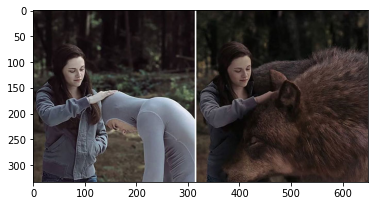

In [14]:
plt.imshow(rawData[0][0], cmap="gray")

In [18]:
rawData[10][1]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.48, 'y': 0.10385756676557864},
   {'x': 0.7716666666666666, 'y': 0.6795252225519288}],
  'imageWidth': 600,
  'imageHeight': 337}]

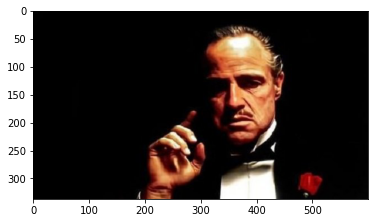

In [17]:
plt.imshow(rawData[10][0], cmap="gray")

In [19]:
# Get and resize train images and masks

In [12]:
#move train images to another numpy arr for images

X=rawData[:,[0]]
y=rawData[:,[1]]
print(X.shape)


(409, 1)


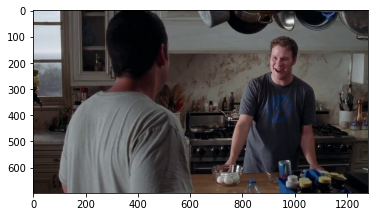

In [13]:
plt.imshow(X[1][0], cmap="gray")

In [14]:
y[1]

array([list([{'label': ['Face'], 'notes': '', 'points': [{'x': 0.7053087757313109, 'y': 0.23260437375745527}, {'x': 0.7692307692307693, 'y': 0.36182902584493043}], 'imageWidth': 1280, 'imageHeight': 697}])],
      dtype=object)

In [15]:
type(y[1])

numpy.ndarray

## Create features (images) and labels (mask) using that data.

In [ ]:
#Saving images to local drive

In [41]:
from PIL import Image

train_folder= 'F:\GreatLearning\AI\ComputerVision\Project2\Part1\\training_images'
mask_folder= 'F:\GreatLearning\AI\ComputerVision\Project2\Part1\\masks'

if not os.path.exists(train_folder):
    os.makedirs(train_folder)

if not os.path.exists(mask_folder):
    os.makedirs(mask_folder)

for count, img in enumerate(X):
    im=Image.fromarray(img[0])
    filename='img00'+str(count)+'.PNG'
    filename=os.path.join(train_folder,filename)
    im.save(filename)
    

In [2]:
#use images created from this point

- Exploring how the images and coordinates works

In [3]:
import math
math.floor(0.7053087757313109*1280)

902

In [4]:
#coordinates - x = x_norm*width, y=y_norm*height

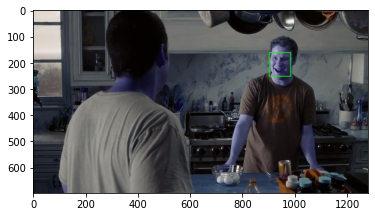

In [5]:
import cv2
file='F:\\GreatLearning\\AI\\ComputerVision\\Project2\\Part1\\training_images\\img001.PNG'
im = cv2.imread(str(file))
cv2.rectangle(im,( math.floor(0.7053087757313109*1280),math.floor(0.23260437375745527*697)), (math.floor(0.7692307692307693*1280),math.floor(0.36182902584493043*697)), (0,255,0), 2)
plt.imshow(im)

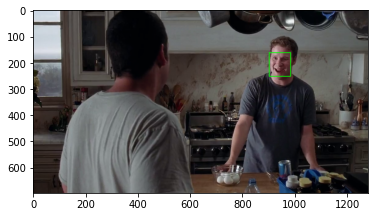

In [6]:
import cv2
file='F:\\GreatLearning\\AI\\ComputerVision\\Project2\\Part1\\training_images\\img001.PNG'
im = cv2.imread(str(file))
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)#change color space
cv2.rectangle(im,( int(0.7053087757313109*1280),int(0.23260437375745527*697)), (int(0.7692307692307693*1280),int(0.36182902584493043*697)), (0,255,0), 2)

plt.imshow(im)

In [56]:
im.shape

(333, 650, 3)

In [8]:
#For cerating mask

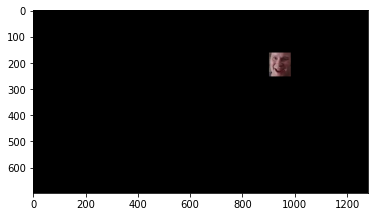

In [9]:
file='F:\\GreatLearning\\AI\\ComputerVision\\Project2\\Part1\\training_images\\img001.PNG'
im = cv2.imread(str(file))
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)#change color space
height,width,depth = im.shape



rect_img = np.zeros((height,width), np.uint8)
#cv2.rectangle(rect_img,(int(width/2),int(height/2)),200,1,thickness=-1)
cv2.rectangle(rect_img,( int(0.7053087757313109*1280),int(0.23260437375745527*697)), (int(0.7692307692307693*1280),int(0.36182902584493043*697)), 200,thickness=-1)
masked_data = cv2.bitwise_and(im, im, mask=rect_img)

#cv2.imshow("masked_data", masked_data)
#cv2.waitKey(0)

plt.imshow(masked_data)

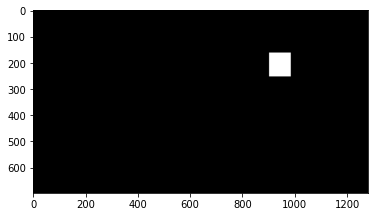

In [18]:
file='F:\\GreatLearning\\AI\\ComputerVision\\Project2\\Part1\\training_images\\img001.PNG'
im = cv2.imread(str(file))
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)#change color space
height,width,depth = im.shape


temp_img=np.ones(im.shape)
rect_img = np.zeros((height,width), np.uint8)
cv2.rectangle(rect_img,( int(0.7053087757313109*1280),int(0.23260437375745527*697)),
              (int(0.7692307692307693*1280),int(0.36182902584493043*697)),
              200,
              thickness=-1)
masked_data2 = cv2.bitwise_and(temp_img, temp_img, mask=rect_img)



#cv2.imshow("masked_data", masked_data)
#cv2.waitKey(0)

plt.imshow(masked_data2)

In [58]:
xstart_norm=0.08615384615384615
ystart_norm= 0.3063063063063063
xend_norm=0.1723076923076923
yend_norm=0.45345345345345345
x1start_norm= 0.583076923076923
y1start_norm=0.2912912912912913
x1end_norm=0.6584615384615384
y1end_norm=0.46846846846846846

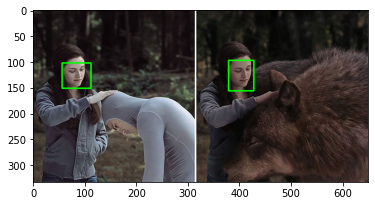

In [61]:
import cv2
file='F:\\GreatLearning\\AI\\ComputerVision\\Project2\\Part1\\training_images\\img000.PNG'
im = cv2.imread(str(file))
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)#change color space
imageHeight,imageWidth,depth = im.shape

cv2.rectangle(im,
              ( int(xstart_norm*imageWidth),int(ystart_norm*imageHeight)),
              (int(xend_norm*imageWidth),int(yend_norm*imageHeight)),
              (0,255,0), 2)
cv2.rectangle(im,
              ( int(x1start_norm*imageWidth),int(y1start_norm*imageHeight)),
              (int(x1end_norm*imageWidth),int(y1end_norm*imageHeight)),
              (0,255,0), 2)

plt.imshow(im)

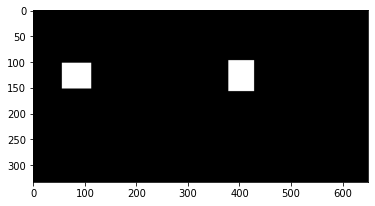

In [63]:
file='F:\\GreatLearning\\AI\\ComputerVision\\Project2\\Part1\\training_images\\img000.PNG'
im = cv2.imread(str(file))
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)#change color space
height,width,depth = im.shape


temp_img=np.ones(im.shape)
rect_img = np.zeros((height,width), np.uint8)
cv2.rectangle(rect_img,
              ( int(xstart_norm*imageWidth),int(ystart_norm*imageHeight)),
              (int(xend_norm*imageWidth),int(yend_norm*imageHeight)),
              200,
              thickness=-1)
cv2.rectangle(rect_img,
              ( int(x1start_norm*imageWidth),int(y1start_norm*imageHeight)),
              (int(x1end_norm*imageWidth),int(y1end_norm*imageHeight)),
              200,
              thickness=-1)

masked_data2 = cv2.bitwise_and(temp_img, temp_img, mask=rect_img)



#cv2.imshow("masked_data", masked_data)
#cv2.waitKey(0)

plt.imshow(masked_data2)

In [32]:
y[0]

array([list([{'label': ['Face'], 'notes': '', 'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063}, {'x': 0.1723076923076923, 'y': 0.45345345345345345}], 'imageWidth': 650, 'imageHeight': 333}, {'label': ['Face'], 'notes': '', 'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913}, {'x': 0.6584615384615384, 'y': 0.46846846846846846}], 'imageWidth': 650, 'imageHeight': 333}])],
      dtype=object)

In [29]:
y[0][0]

[{'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
   {'x': 0.1723076923076923, 'y': 0.45345345345345345}],
  'imageWidth': 650,
  'imageHeight': 333},
 {'label': ['Face'],
  'notes': '',
  'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
   {'x': 0.6584615384615384, 'y': 0.46846846846846846}],
  'imageWidth': 650,
  'imageHeight': 333}]

In [47]:
len(y[0][0])

2

In [26]:
y[0][0][0]

{'label': ['Face'],
 'notes': '',
 'points': [{'x': 0.08615384615384615, 'y': 0.3063063063063063},
  {'x': 0.1723076923076923, 'y': 0.45345345345345345}],
 'imageWidth': 650,
 'imageHeight': 333}

In [37]:
y[0][0][1]

{'label': ['Face'],
 'notes': '',
 'points': [{'x': 0.583076923076923, 'y': 0.2912912912912913},
  {'x': 0.6584615384615384, 'y': 0.46846846846846846}],
 'imageWidth': 650,
 'imageHeight': 333}

In [38]:
print(type(y[0]))
print(type(y[0][0]))
print(len(y[0][0]))
print(type(y[0][0][1]))

<class 'numpy.ndarray'>
<class 'list'>
2
<class 'dict'>


In [42]:
print(y[0][0][1].get('label'))
print(y[0][0][1].get('notes'))
print(y[0][0][1].get('points'))
print(y[0][0][1].get('imageWidth'))
print(y[0][0][1].get('imageHeight'))
print(y[0][0][1].get('points')[0].get('x'))

['Face']

[{'x': 0.583076923076923, 'y': 0.2912912912912913}, {'x': 0.6584615384615384, 'y': 0.46846846846846846}]
650
333
0.583076923076923


In [53]:
test_img=y[0]
print(len(test_img[0]))
print(test_img[0][1].get('label'))
#print(test_img[0][1].get('notes'))
print(test_img[0][1].get('points'))
print(test_img[0][1].get('imageWidth'))
print(test_img[0][1].get('imageHeight'))
print(test_img[0][1].get('points')[0].get('x'))

2
['Face']
[{'x': 0.583076923076923, 'y': 0.2912912912912913}, {'x': 0.6584615384615384, 'y': 0.46846846846846846}]
650
333
0.583076923076923


Faces: 2
['Face'] 333 650 0.08615384615384615 0.1723076923076923 0.3063063063063063 0.45345345345345345
['Face'] 333 650 0.583076923076923 0.6584615384615384 0.2912912912912913 0.46846846846846846


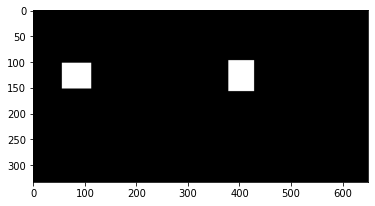

In [97]:
test_img=y[0]
file='F:\\GreatLearning\\AI\\ComputerVision\\Project2\\Part1\\training_images\\img000.PNG'
im = cv2.imread(str(file))
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)#change color space
height,width,depth = im.shape

temp_img=np.ones(im.shape)
rect_img = np.zeros((height,width), np.uint8)
faces=test_img[0]
print('Faces:', len(faces))
for face in faces:
    label=face.get('label')
    imageWidth=face.get('imageWidth')
    imageHeight=face.get('imageHeight')
    xstart_norm=face.get('points')[0].get('x')
    ystart_norm=face.get('points')[0].get('y')
    xend_norm=face.get('points')[1].get('x')
    yend_norm=face.get('points')[1].get('y')
    print(label,imageHeight,imageWidth,xstart_norm,xend_norm,ystart_norm,yend_norm)
    #temp_img=np.ones(im.shape)
    #rect_img = np.zeros((height,width), np.uint8)
    cv2.rectangle(rect_img,
                  ( int(xstart_norm*imageWidth),int(ystart_norm*imageHeight)),
                  (int(xend_norm*imageWidth),int(yend_norm*imageHeight)),
                  200,
                  thickness=-1)
    masked_data2 = cv2.bitwise_and(temp_img, temp_img, mask=rect_img)
    
plt.imshow(masked_data2)

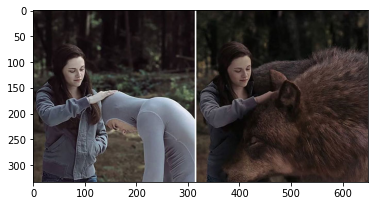

In [98]:
plt.imshow(im)

Faces: 6
['Face'] 326 580 0.5586206896551724 0.6603448275862069 0.19938650306748465 0.3773006134969325
['Face'] 326 580 0.38620689655172413 0.4896551724137931 0.18711656441717792 0.4049079754601227
['Face'] 326 580 0.1724137931034483 0.2775862068965517 0.23006134969325154 0.44171779141104295
['Face'] 326 580 0.7155172413793104 0.8448275862068966 0.19938650306748465 0.41411042944785276
['Face'] 326 580 0.2982758620689655 0.4189655172413793 0.44171779141104295 0.6533742331288344
['Face'] 326 580 0.6362068965517241 0.7362068965517241 0.4233128834355828 0.6104294478527608


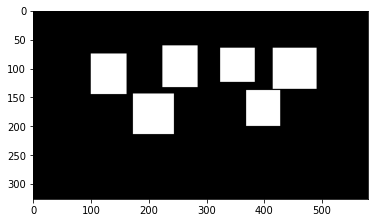

In [104]:
test_img=y[4]
file='F:\\GreatLearning\\AI\\ComputerVision\\Project2\\Part1\\training_images\\img004.PNG'
im = cv2.imread(str(file))
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)#change color space
height,width,depth = im.shape

temp_img=np.ones(im.shape)
rect_img = np.zeros((height,width), np.uint8)
faces=test_img[0]
print('Faces:', len(faces))
for face in faces:
    label=face.get('label')
    imageWidth=face.get('imageWidth')
    imageHeight=face.get('imageHeight')
    xstart_norm=face.get('points')[0].get('x')
    ystart_norm=face.get('points')[0].get('y')
    xend_norm=face.get('points')[1].get('x')
    yend_norm=face.get('points')[1].get('y')
    print(label,imageHeight,imageWidth,xstart_norm,xend_norm,ystart_norm,yend_norm)
    #temp_img=np.ones(im.shape)
    #rect_img = np.zeros((height,width), np.uint8)
    cv2.rectangle(rect_img,
                  ( int(xstart_norm*imageWidth),int(ystart_norm*imageHeight)),
                  (int(xend_norm*imageWidth),int(yend_norm*imageHeight)),
                  200,
                  thickness=-1)
    masked_data2 = cv2.bitwise_and(temp_img, temp_img, mask=rect_img)
    
plt.imshow(masked_data2)

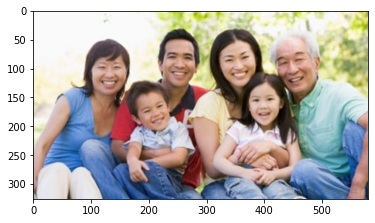

In [105]:
plt.imshow(im)

In [ ]:
#saving masks to local drive

In [106]:
from PIL import Image

train_folder= 'F:\GreatLearning\AI\ComputerVision\Project2\Part1\training_images'
mask_folder= 'F:\GreatLearning\AI\ComputerVision\Project2\Part1\masks'

if not os.path.exists(train_folder):
    os.makedirs(train_folder)

if not os.path.exists(mask_folder):
    os.makedirs(mask_folder)

for count, img in enumerate(y):
    
    filename='img00'+str(count)+'.PNG'
    train_filename=os.path.join(train_folder,filename)
    mask_filename=os.path.join(mask_folder ,filename)
    im = cv2.imread(str(train_filename))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)#change color space
    height,width,depth = im.shape
    masked_data=[]
    temp_img=np.ones(im.shape,dtype='uint8')
    rect_img = np.zeros((height,width), np.uint8)
    #get total no of faces from len of list
    faces=img[0]
    print(count,'Faces:', len(faces))
    for face in faces:
        label=face.get('label')
        imageWidth=face.get('imageWidth')
        imageHeight=face.get('imageHeight')
        xstart_norm=face.get('points')[0].get('x')
        ystart_norm=face.get('points')[0].get('y')
        xend_norm=face.get('points')[1].get('x')
        yend_norm=face.get('points')[1].get('y')
        print(count,label,imageHeight,imageWidth,xstart_norm,xend_norm,ystart_norm,yend_norm)
        
        cv2.rectangle(rect_img,
                      ( int(xstart_norm*imageWidth),int(ystart_norm*imageHeight)),
                      (int(xend_norm*imageWidth),int(yend_norm*imageHeight)),
                      200,
                      thickness=-1)
        masked_data = cv2.bitwise_and(temp_img, temp_img, mask=rect_img)
        
    #plt.imshow(masked_data)
    
    im = Image.fromarray(masked_data.reshape((im.shape)).astype('uint8')*255)
    im.save(mask_filename)
    cv2.destroyAllWindows()

0 Faces: 2
0 ['Face'] 333 650 0.08615384615384615 0.1723076923076923 0.3063063063063063 0.45345345345345345
0 ['Face'] 333 650 0.583076923076923 0.6584615384615384 0.2912912912912913 0.46846846846846846
1 Faces: 1
1 ['Face'] 697 1280 0.7053087757313109 0.7692307692307693 0.23260437375745527 0.36182902584493043
2 Faces: 2
2 ['Face'] 240 460 0.46956521739130436 0.6065217391304348 0.05 0.3333333333333333
2 ['Face'] 240 460 0.6282608695652174 0.7456521739130435 0.008333333333333333 0.30833333333333335
3 Faces: 1
3 ['Face'] 291 600 0.495 0.595 0.27147766323024053 0.46048109965635736
4 Faces: 6
4 ['Face'] 326 580 0.5586206896551724 0.6603448275862069 0.19938650306748465 0.3773006134969325
4 ['Face'] 326 580 0.38620689655172413 0.4896551724137931 0.18711656441717792 0.4049079754601227
4 ['Face'] 326 580 0.1724137931034483 0.2775862068965517 0.23006134969325154 0.44171779141104295
4 ['Face'] 326 580 0.7155172413793104 0.8448275862068966 0.19938650306748465 0.41411042944785276
4 ['Face'] 326 58

37 Faces: 1
37 ['Face'] 730 1296 0.7638136511375948 0.8591549295774648 0.21923076923076923 0.425
38 Faces: 2
38 ['Face'] 1081 720 0.4263888888888889 0.6680555555555555 0.37465309898242366 0.5689176688251619
38 ['Face'] 1081 720 0.4791666666666667 0.6930555555555555 0.09435707678075855 0.2664199814986124
39 Faces: 1
39 ['Face'] 1504 2000 0.7475622968580715 0.8039003250270856 0.06051873198847262 0.22622478386167147
40 Faces: 2
40 ['Face'] 402 640 0.21875 0.3140625 0.263681592039801 0.599502487562189
40 ['Face'] 402 640 0.5671875 0.6796875 0.39054726368159204 0.6517412935323383
41 Faces: 1
41 ['Face'] 340 516 0.6996124031007752 0.8430232558139535 0.36176470588235293 0.5647058823529412
42 Faces: 4
42 ['Face'] 350 804 0.31716417910447764 0.3818407960199005 0.2885714285714286 0.4514285714285714
42 ['Face'] 350 804 0.4689054726368159 0.5422885572139303 0.15142857142857144 0.30857142857142855
42 ['Face'] 350 804 0.1890547263681592 0.2512437810945274 0.64 0.7857142857142857
42 ['Face'] 350 804 

78 Faces: 2
78 ['Face'] 512 650 0.19692307692307692 0.36 0.177734375 0.3515625
78 ['Face'] 512 650 0.4969230769230769 0.6230769230769231 0.18359375 0.3671875
79 Faces: 1
79 ['Face'] 425 638 0.2852664576802508 0.6567398119122257 0.12 0.6894117647058824
80 Faces: 2
80 ['Face'] 719 1280 0.24205378973105135 0.36593317033414835 0.20319303338171263 0.41654571843251087
80 ['Face'] 719 1280 0.40179299103504484 0.5362673186634067 0.04644412191582003 0.32365747460087085
81 Faces: 2
81 ['Face'] 720 1280 0.45764462809917356 0.5196280991735537 0.375 0.4797794117647059
81 ['Face'] 720 1280 0.027892561983471075 0.06921487603305786 0.35294117647058826 0.45955882352941174
82 Faces: 1
82 ['Face'] 286 500 0.47 0.598 0.03496503496503497 0.2867132867132867
83 Faces: 4
83 ['Face'] 627 940 0.2979414951245937 0.40303358613217766 0.11688311688311688 0.31006493506493504
83 ['Face'] 627 940 0.48320693391115926 0.5763813651137595 0.288961038961039 0.44642857142857145
83 ['Face'] 627 940 0.6977248104008668 0.81473

118 Faces: 1
118 ['Face'] 296 1024 0.37293388429752067 0.5619834710743802 0.04642857142857143 0.6392857142857142
119 Faces: 5
119 ['Face'] 339 634 0.08201892744479496 0.2444794952681388 0.15634218289085547 0.5575221238938053
119 ['Face'] 339 634 0.2618296529968454 0.42113564668769715 0.02654867256637168 0.4896755162241888
119 ['Face'] 339 634 0.44952681388012616 0.6277602523659306 0.06784660766961652 0.44542772861356933
119 ['Face'] 339 634 0.6309148264984227 0.7476340694006309 0.22713864306784662 0.5752212389380531
119 ['Face'] 339 634 0.7791798107255521 0.9037854889589906 0.1415929203539823 0.5309734513274337
120 Faces: 1
120 ['Face'] 286 468 0.4658119658119658 0.9978632478632479 0.006993006993006993 0.958041958041958
121 Faces: 1
121 ['Face'] 393 634 0.6813880126182965 0.9605678233438486 0.027989821882951654 0.5776081424936387
122 Faces: 2
122 ['Face'] 350 600 0.30333333333333334 0.4033333333333333 0.04285714285714286 0.29428571428571426
122 ['Face'] 350 600 0.6066666666666667 0.763

155 Faces: 3
155 ['Face'] 699 2000 0.4607438016528926 0.6663223140495868 0.40236686390532544 0.9349112426035503
155 ['Face'] 699 2000 0.6931818181818182 0.9070247933884298 0.3905325443786982 0.9437869822485208
155 ['Face'] 699 2000 0.24173553719008264 0.38739669421487605 0 0.5059171597633136
156 Faces: 8
156 ['Face'] 574 850 0.46352941176470586 0.6494117647058824 0.32578397212543553 0.6393728222996515
156 ['Face'] 574 850 0.6141176470588235 0.7129411764705882 0.18989547038327526 0.35365853658536583
156 ['Face'] 574 850 0.0976470588235294 0.18470588235294116 0.397212543554007 0.5993031358885017
156 ['Face'] 574 850 0.32235294117647056 0.4235294117647059 0.3083623693379791 0.47735191637630664
156 ['Face'] 574 850 0.4188235294117647 0.4858823529411765 0.2700348432055749 0.4059233449477352
156 ['Face'] 574 850 0.8352941176470589 0.9070588235294118 0.14111498257839722 0.23519163763066203
156 ['Face'] 574 850 0.029411764705882353 0.08588235294117647 0.3153310104529617 0.4076655052264808
156 

184 Faces: 3
184 ['Face'] 1042 625 0.4272 0.5504 0.09213051823416507 0.1833013435700576
184 ['Face'] 1042 625 0.5536 0.7008 0.4309021113243762 0.5575815738963532
184 ['Face'] 1042 625 0.4656 0.6256 0.7418426103646834 0.8579654510556622
185 Faces: 4
185 ['Face'] 360 480 0.022916666666666665 0.17916666666666667 0.225 0.6
185 ['Face'] 360 480 0.2875 0.37916666666666665 0.3 0.46111111111111114
185 ['Face'] 360 480 0.6375 0.7729166666666667 0.19444444444444445 0.4722222222222222
185 ['Face'] 360 480 0.83125 0.9979166666666667 0.17222222222222222 0.4638888888888889
186 Faces: 6
186 ['Face'] 720 576 0.1684027777777778 0.3385416666666667 0.020833333333333332 0.18055555555555555
186 ['Face'] 720 576 0.3854166666666667 0.4982638888888889 0.029166666666666667 0.14305555555555555
186 ['Face'] 720 576 0.3524305555555556 0.4791666666666667 0.35138888888888886 0.4638888888888889
186 ['Face'] 720 576 0.1597222222222222 0.3090277777777778 0.3402777777777778 0.4930555555555556
186 ['Face'] 720 576 0.178

210 ['Face'] 268 182 0.5989010989010989 0.8186813186813187 0.026119402985074626 0.1828358208955224
210 ['Face'] 268 182 0.17032967032967034 0.3956043956043956 0.19029850746268656 0.31716417910447764
211 Faces: 4
211 ['Face'] 578 540 0.08703703703703704 0.3851851851851852 0.10207612456747404 0.3235294117647059
211 ['Face'] 578 540 0.6518518518518519 0.8481481481481481 0.04498269896193772 0.27335640138408307
211 ['Face'] 578 540 0.12222222222222222 0.29074074074074074 0.5986159169550173 0.7854671280276817
211 ['Face'] 578 540 0.6777777777777778 0.8796296296296297 0.5501730103806228 0.7768166089965398
212 Faces: 5
212 ['Face'] 811 540 0.5925925925925926 0.8703703703703703 0.02466091245376079 0.2638717632552404
212 ['Face'] 811 540 0.15925925925925927 0.36666666666666664 0.35018495684340323 0.499383477188656
212 ['Face'] 811 540 0.562962962962963 0.7518518518518519 0.43403205918618987 0.5672009864364982
212 ['Face'] 811 540 0.24074074074074073 0.4222222222222222 0.6942046855733662 0.858199

243 Faces: 1
243 ['Face'] 500 775 0.45161290322580644 0.5612903225806452 0.12 0.366
244 Faces: 5
244 ['Face'] 300 600 0.6383333333333333 0.8316666666666667 0.43 0.8166666666666667
244 ['Face'] 300 600 0.2783333333333333 0.4683333333333333 0.13333333333333333 0.6833333333333333
244 ['Face'] 300 600 0.48833333333333334 0.555 0.28 0.4166666666666667
244 ['Face'] 300 600 0.6283333333333333 0.695 0.04 0.19333333333333333
244 ['Face'] 300 600 0.9166666666666666 0.9933333333333333 0.10333333333333333 0.27
245 Faces: 2
245 ['Face'] 662 1200 0.46 0.6558333333333334 0.1646525679758308 0.5966767371601208
245 ['Face'] 662 1200 0.3075 0.4558333333333333 0.019637462235649546 0.6435045317220544
246 Faces: 2
246 ['Face'] 472 630 0.05555555555555555 0.5365079365079365 0.05084745762711865 0.711864406779661
246 ['Face'] 472 630 0.4603174603174603 0.7777777777777778 0.00423728813559322 0.652542372881356
247 Faces: 1
247 ['Face'] 379 505 0.36237623762376237 0.699009900990099 0.17150395778364116 0.707124010

279 Faces: 1
279 ['Face'] 720 1280 0.21189894050529748 0.5770171149144254 0.16376811594202897 0.8260869565217391
280 Faces: 1
280 ['Face'] 720 1280 0.228602383531961 0.361863488624052 0.14258188824662812 0.40847784200385356
281 Faces: 1
281 ['Face'] 720 1280 0.3037190082644628 0.484504132231405 0.1488970588235294 0.5882352941176471
282 Faces: 3
282 ['Face'] 720 1280 0.2665289256198347 0.44214876033057854 0.08639705882352941 0.40625
282 ['Face'] 720 1280 0.5092975206611571 0.6146694214876033 0.17830882352941177 0.4319852941176471
282 ['Face'] 720 1280 0.6394628099173554 0.8223140495867769 0.23529411764705882 0.5551470588235294
283 Faces: 3
283 ['Face'] 534 1280 0.20374898125509372 0.29584352078239606 0.30859375 0.47265625
283 ['Face'] 534 1280 0.3056234718826406 0.41972290138549306 0.34375 0.603515625
283 ['Face'] 534 1280 0.5248573757131214 0.6365118174409128 0.19140625 0.47265625
284 Faces: 3
284 ['Face'] 576 1024 0.16632231404958678 0.31508264462809915 0.23345588235294118 0.487132352

313 Faces: 1
313 ['Face'] 350 660 0.45454545454545453 0.7454545454545455 0.1657142857142857 0.7428571428571429
314 Faces: 3
314 ['Face'] 360 480 0.34375 0.4354166666666667 0.3138888888888889 0.4583333333333333
314 ['Face'] 360 480 0.6666666666666666 0.7770833333333333 0.4 0.55
314 ['Face'] 360 480 0.55 0.625 0.48333333333333334 0.6361111111111111
315 Faces: 3
315 ['Face'] 667 1000 0.3391115926327194 0.4225352112676056 0.24675324675324675 0.39285714285714285
315 ['Face'] 667 1000 0.4355362946912243 0.5395449620801733 0.14935064935064934 0.3068181818181818
315 ['Face'] 667 1000 0.581798483206934 0.6468039003250271 0.40584415584415584 0.5292207792207793
316 Faces: 1
316 ['Face'] 1000 2000 0.5536294691224268 0.6977248104008668 0.2532467532467532 0.6212121212121212
317 Faces: 5
317 ['Face'] 1053 1600 0.7807660961695192 0.9209453952730237 0.15489467162329615 0.36926889714993805
317 ['Face'] 1053 1600 0.5851670741646292 0.7237163814180929 0.13135068153655513 0.36059479553903345
317 ['Face'] 1

341 ['Face'] 487 786 0.2340966921119593 0.3384223918575064 0.28542094455852157 0.5071868583162218
342 Faces: 2
342 ['Face'] 268 480 0.25625 0.4666666666666667 0.04477611940298507 0.4291044776119403
342 ['Face'] 268 480 0.575 0.7833333333333333 0.07462686567164178 0.45149253731343286
343 Faces: 11
343 ['Face'] 684 1024 0.1115702479338843 0.18698347107438015 0.21517027863777088 0.33900928792569657
343 ['Face'] 684 1024 0.06301652892561983 0.12086776859504132 0.25696594427244585 0.369969040247678
343 ['Face'] 684 1024 0.3109504132231405 0.381198347107438 0.22291021671826625 0.35139318885448917
343 ['Face'] 684 1024 0.3894628099173554 0.44214876033057854 0.23219814241486067 0.3498452012383901
343 ['Face'] 684 1024 0.4669421487603306 0.5330578512396694 0.28173374613003094 0.38544891640866874
343 ['Face'] 684 1024 0.6663223140495868 0.7871900826446281 0.2089783281733746 0.4024767801857585
343 ['Face'] 684 1024 0.8801652892561983 0.9721074380165289 0.24613003095975233 0.413312693498452
343 ['

374 Faces: 7
374 ['Face'] 464 825 0.7357575757575757 0.8084848484848485 0.08620689655172414 0.21551724137931033
374 ['Face'] 464 825 0.7345454545454545 0.823030303030303 0.4331896551724138 0.5969827586206896
374 ['Face'] 464 825 0.6242424242424243 0.6884848484848485 0.34913793103448276 0.5043103448275862
374 ['Face'] 464 825 0.4121212121212121 0.49333333333333335 0.33836206896551724 0.5150862068965517
374 ['Face'] 464 825 0.23393939393939395 0.3187878787878788 0.3448275862068966 0.5452586206896551
374 ['Face'] 464 825 0.32242424242424245 0.36727272727272725 0.3297413793103448 0.5107758620689655
374 ['Face'] 464 825 0.10666666666666667 0.1684848484848485 0.03017241379310345 0.2801724137931034
375 Faces: 7
375 ['Face'] 2333 3500 0.14842903575297942 0.2600216684723727 0.33983739837398375 0.49105691056910566
375 ['Face'] 2333 3500 0.26977248104008666 0.37161430119176597 0.1983739837398374 0.36910569105691055
375 ['Face'] 2333 3500 0.39653304442036835 0.47562296858071507 0.16910569105691056

398 Faces: 1
398 ['Face'] 385 640 0.546875 0.6953125 0.11948051948051948 0.38961038961038963
399 Faces: 1
399 ['Face'] 587 880 0.48863636363636365 0.7079545454545455 0.10732538330494037 0.444633730834753
400 Faces: 3
400 ['Face'] 1357 1357 0.35969664138678226 0.600216684723727 0.23835319609967498 0.4788732394366197
400 ['Face'] 1357 1357 0.11700975081256772 0.3131094257854821 0.38894907908992415 0.5969664138678223
400 ['Face'] 1357 1357 0.5319609967497292 0.7313109425785482 0.6164680390032503 0.8548212351029253
401 Faces: 1
401 ['Face'] 319 567 0.6419753086419753 0.7266313932980599 0.3103448275862069 0.47648902821316613
402 Faces: 7
402 ['Face'] 900 1600 0.20211898940505296 0.2697636511817441 0.14347826086956522 0.2768115942028985
402 ['Face'] 900 1600 0.32681336593317034 0.3854930725346373 0.05652173913043478 0.20869565217391303
402 ['Face'] 900 1600 0.38386308068459657 0.4392828035859821 0.24492753623188407 0.3144927536231884
402 ['Face'] 900 1600 0.4710676446617767 0.533007334963325

- Saved Image and Mask/label on local drive